In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# plt.rcParams["figure.figsize"] = (20, 10)
import seaborn as sns

# Predicting Sofia real estate prices

The project is focused on predicting real estate prices in Sofia, Bulgaria. With the growing interest in the real estate market and increasing complexity of property values, our goal is to leverage historical data to forecast future prices. Understanding and predicting real estate prices can provide valuable insights for buyers, sellers, investors, and policymakers.

The real estate market in Sofia, Bulgaria, is constantly changing. Understanding how property prices are influenced and predicting future values is important for everyone involved in buying, selling, or investing in real estate. This project aims to forecast property prices in Sofia using historical data to help people make better decisions in the real estate market.

By analyzing past transactions and key factors that affect property values—such as location, size, and property features—we will develop a model to predict future prices. My goal is to provide clear, accurate predictions that can guide buyers, sellers, and investors in making informed choices.

This project is a significant step towards improving my understanding of Sofia’s real estate market. With the help of data-driven insights, I hope to make it easier for people to navigate the complexities of property pricing and find valuable opportunities in the market.

### The goals of the project:
- To understand the key drivers of real estate prices in Sofia.
- To build and evaluate a machine learning model that can predict property prices.

### Why this problem is important?

__1. Importance for Investors__: <br/>
- Maximizing Returns: Real estate is one of the most significant and stable forms of investment. Investors rely on accurate price predictions to identify undervalued properties, time their purchases, and decide on the most profitable resale opportunities. By predicting future prices, investors can optimize their portfolios, maximize returns, and mitigate risks.
- Market Timing: For investors, knowing when to buy or sell is crucial. Accurate price predictions can help investors time the market effectively, allowing them to buy properties before prices increase and sell before a downturn. This timing can significantly affect the profitability of real estate investments.
- Diversification and Risk Management: Understanding price trends in different neighborhoods or property types allows investors to diversify their portfolios. They can spread their investments across various segments of the market, reducing the risk of exposure to price volatility in any single area.

__2. Importance for Homebuyers:__ <br/>
- Affordability and Budgeting: For most people, buying a home is the largest financial commitment they will make in their lifetime. Predicting future prices helps homebuyers understand market trends, ensuring they purchase at the right time to get the best value for their money. It also helps them budget accurately for future financial planning, such as mortgage payments and maintenance costs.
- Avoiding Overpayment: Accurate predictions can prevent homebuyers from overpaying in a competitive market. By understanding the fair value of properties, buyers can make informed decisions, avoid bidding wars, and negotiate better deals.
- Long-term Financial Planning: Homebuyers need to consider the long-term value of their investment. Predictions about property prices can guide them in choosing neighborhoods with strong potential for appreciation, ensuring that their home not only meets their immediate needs but also grows in value over time.

__3. Importance for Urban Planners and Policy Makers:__ <br/>
- Sustainable Urban Development: Urban planners rely on real estate price predictions to make informed decisions about zoning, infrastructure development, and public services. By understanding where prices are likely to rise, planners can allocate resources efficiently, ensuring sustainable growth and avoiding overdevelopment or underdevelopment in specific areas.
- Economic Policy and Housing Affordability: Accurate price predictions are crucial for developing policies that address housing affordability and social equity. Policymakers can use these predictions to implement measures such as affordable housing initiatives, rent controls, and tax incentives to stabilize markets and prevent housing bubbles.
- Infrastructure Planning: Understanding future real estate trends helps in planning for infrastructure needs, such as transportation, schools, and healthcare facilities. By anticipating areas of growth, urban planners can ensure that necessary services are in place to support population increases, thereby enhancing the quality of life for residents.

__4. Importance for the Broader Economy:__ <br/>
- Economic Stability: The real estate market is a significant component of the economy. Price fluctuations can impact consumer spending, banking stability, and overall economic health. Accurate predictions help prevent housing market bubbles, which, if left unchecked, could lead to economic recessions, as seen in the 2008 financial crisis (Global Financial Crisis (GFC) ).
- Employment and Industry Growth: The construction, finance, and retail sectors are closely tied to the real estate market. Predicting price trends allows businesses in these industries to plan for demand, hire appropriately, and make investments in their operations, contributing to overall economic growth.

In summary, real estate price prediction is a critical tool for a wide range of stakeholders. It empowers investors to maximize returns, enables homebuyers to make informed decisions, assists urban planners in managing growth sustainably, and supports policymakers in maintaining economic stability. Accurate predictions contribute to the health and efficiency of the real estate market and, by extension, the broader economy.

## Description of Datasets:
The websites that I used: __https://www.imoti.net/bg__  and __https://www.imot.bg/__ .


### Dataset 1: Historical Real Estate Prices from imoti.net
Description: This dataset provides historical real estate price data from imoti.net, including the following details:

- Location: The area or district where the property is located.
- Total Price (EUR): The overall cost of the property.
- Price per Square Meter (EUR/m²): The cost per square meter of the property.
- Property Type: The type of property (e.g., apartment, house, commercial).
- Date: The date when the price data was recorded.

### Dataset 2: Historical Real Estate Prices from imot.bg
Description: This dataset contains historical real estate price data from imot.bg, including the following details:

- Location: The specific area or district in Sofia, Bulgaria.
- One-Bedroom Apartments:
    - Total Price (EUR)
    - Price per Square Meter (EUR/m²)
- Two-Bedroom Apartments:
    - Total Price (EUR)
    - Price per Square Meter (EUR/m²)
- Three-Bedroom Apartments:
    - Total Price (EUR)
    - Price per Square Meter (EUR/m²)
- Date: The date when the data was recorded, indicating the time frame for each entry.


## Exploratory Data Analysis (EDA): 
Let's perform an EDA to understand the distribution, relationships, and outliers in THE data.

### And now we will read the first dataset. 
Actually inside it there are 3 files. We will read them and save in variables:

In [3]:
df_2022 = pd.read_csv("data/property_prices_july_2022.csv")
df_2023 = pd.read_csv("data/property_prices_july_2023.csv")
df_2024 = pd.read_csv("data/property_prices_july_2024.csv")

Let's have a look in everyone:

In [4]:
df_2022

,Район,Цена,Цена / кв.м.,Валута,Тип Апартамент,Дата
0,Банишора,110201.52,1710.14,EUR,Двустаен апартамент,2022-07-28
1,Белите Брези,148125.00,1949.01,EUR,Двустаен апартамент,2022-07-28
2,Борово,141912.50,2120.07,EUR,Двустаен апартамент,2022-07-28
3,Бояна,167608.23,1888.09,EUR,Двустаен апартамент,2022-07-28
4,Бъкстон,109764.43,1869.47,EUR,Двустаен апартамент,2022-07-28
...,...,...,...,...,...,...
284,Хаджи Димитър,205000.00,1102.15,EUR,Многостаен апартамемент,2022-07-28
285,Хиподрума,377277.50,1326.89,EUR,Многостаен апартамемент,2022-07-28
286,Хладилника,460016.66,2115.02,EUR,Многостаен апартамемент,2022-07-28
287,Център,529647.62,2792.63,EUR,Многостаен апартамемент,2022-07-28


In [5]:
df_2023

,Район,Цена,Цена / кв.м.,Валута,Тип Апартамент,Дата
0,7-ми 11-ти километър,112150.66,1654.68,EUR,Двустаен апартамент,2023-07-28
1,Банишора,118202.97,1754.77,EUR,Двустаен апартамент,2023-07-28
2,Банкя (гр.),108600.00,1428.95,EUR,Двустаен апартамент,2023-07-28
3,Белите Брези,162233.00,2015.32,EUR,Двустаен апартамент,2023-07-28
4,Бенковски,94900.00,1395.59,EUR,Двустаен апартамент,2023-07-28
...,...,...,...,...,...,...
326,Хаджи Димитър,239000.00,2489.58,EUR,Многостаен апартамемент,2023-07-28
327,Хиподрума,445521.66,1265.69,EUR,Многостаен апартамемент,2023-07-28
328,Хладилника,490580.00,2063.43,EUR,Многостаен апартамемент,2023-07-28
329,Център,528999.94,2577.88,EUR,Многостаен апартамемент,2023-07-28


In [6]:
df_2024

,Район,Цена,Цена / кв.м.,Валута,Тип Апартамент,Дата
0,Банишора,134653.98,1987.51,EUR,Двустаен апартамент,2024-07-28
1,Банкя (гр.),131843.00,1890.84,EUR,Двустаен апартамент,2024-07-28
2,Белите Брези,249900.00,2108.86,EUR,Двустаен апартамент,2024-07-28
3,Бенковски,115863.50,1782.52,EUR,Двустаен апартамент,2024-07-28
4,Борово,135594.22,2148.50,EUR,Двустаен апартамент,2024-07-28
...,...,...,...,...,...,...
329,Суха Река,303037.00,1864.02,EUR,Многостаен апартамемент,2024-07-28
330,Хаджи Димитър,331999.50,2049.38,EUR,Многостаен апартамемент,2024-07-28
331,Хиподрума,446333.00,1410.21,EUR,Многостаен апартамемент,2024-07-28
332,Хладилника,817960.00,2493.78,EUR,Многостаен апартамемент,2024-07-28


Now we will will combine them in one dataset named __combined_df__:

In [7]:
combined_df = pd.concat([df_2022, df_2023, df_2024], ignore_index=True)

And check it:

In [8]:
combined_df

,Район,Цена,Цена / кв.м.,Валута,Тип Апартамент,Дата
0,Банишора,110201.52,1710.14,EUR,Двустаен апартамент,2022-07-28
1,Белите Брези,148125.00,1949.01,EUR,Двустаен апартамент,2022-07-28
2,Борово,141912.50,2120.07,EUR,Двустаен апартамент,2022-07-28
3,Бояна,167608.23,1888.09,EUR,Двустаен апартамент,2022-07-28
4,Бъкстон,109764.43,1869.47,EUR,Двустаен апартамент,2022-07-28
...,...,...,...,...,...,...
949,Суха Река,303037.00,1864.02,EUR,Многостаен апартамемент,2024-07-28
950,Хаджи Димитър,331999.50,2049.38,EUR,Многостаен апартамемент,2024-07-28
951,Хиподрума,446333.00,1410.21,EUR,Многостаен апартамемент,2024-07-28
952,Хладилника,817960.00,2493.78,EUR,Многостаен апартамемент,2024-07-28


#### Let's take a closer look at the dataset.


In [9]:
combined_df.shape

(954, 6)

It has 954 observations and 6 features.

In [10]:
combined_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Цена,954.0,249583.736960,270069.988558,6500.0,114245.39,170162.100,281079.7725,3000000.00
Цена / кв.м.,954.0,1843.112956,626.005076,17.4,1479.21,1776.785,2140.8050,7741.38


In [11]:
combined_df.dtypes

Район              object
Цена              float64
Цена / кв.м.      float64
Валута             object
Тип Апартамент     object
Дата               object
dtype: object

In [12]:
combined_df["Дата"] = pd.to_datetime(combined_df["Дата"])

Check the converted format:

In [13]:
combined_df["Дата"]

0     2022-07-28
1     2022-07-28
2     2022-07-28
3     2022-07-28
4     2022-07-28
         ...    
949   2024-07-28
950   2024-07-28
951   2024-07-28
952   2024-07-28
953   2024-07-28
Name: Дата, Length: 954, dtype: datetime64[ns]

In [14]:
combined_df.isna().sum()

Район             0
Цена              0
Цена / кв.м.      0
Валута            0
Тип Апартамент    0
Дата              0
dtype: int64

We don't have null values in this dataset.

## Let's read the second dataset

In [15]:
second_df = pd.read_csv("data2/property_prices.csv")

This is it:

In [16]:
second_df

,Район,Едностайни - цена,Едностайни - €/кв.м,Двустайни - цена,Двустайни - €/кв.м,Тристайни - цена,Тристайни - €/кв.м,Общо - €/кв.м,Дата
0,7-ми 11-ти километър,NaN,NaN,145 502,1 675,189 050,1 756,1 745,6.8.2024
1,Банишора,48 978,1 125,104 499,1 679,139 650,1 409,1 598,6.8.2024
2,Белите брези,38 000,826,81 225,1 121,118 749,1 127,1 157,6.8.2024
3,Бенковски,NaN,NaN,70 775,1 488,111 625,1 218,1 335,6.8.2024
4,Борово,50 825,1 057,88 801,1 222,141 550,1 551,1 255,6.8.2024
...,...,...,...,...,...,...,...,...,...
433,с. Мировяне,NaN,NaN,50 350,915,NaN,NaN,851,26.7.2022
434,с. Мрамор,NaN,NaN,68 400,1 140,103 740,1 140,1 140,26.7.2022
435,с. Мърчаево,NaN,NaN,26 600,266,35 862,297,297,26.7.2022
436,с. Панчарево,NaN,NaN,108 878,1 389,159 120,1 134,1 269,26.7.2022


#### Take a closer look at the dataset:

In [17]:
second_df.shape

(438, 9)

It has 439 observations and 9 features.

In [18]:
second_df.describe().T

,count,unique,top,freq
Район,438,152,7-ми 11-ти километър,3
Едностайни - цена,326,226,49 400,8
Едностайни - €/кв.м,326,254,1 176,6
Двустайни - цена,404,313,66 500,9
Двустайни - €/кв.м,404,330,1 425,4
Тристайни - цена,411,331,114 000,7
Тристайни - €/кв.м,411,329,1 254,8
Общо - €/кв.м,438,342,1 140,6
Дата,438,3,6.8.2024,147


Let's see the names of the all columns:

In [19]:
second_df.columns

Index(['Район', 'Едностайни - цена', 'Едностайни - €/кв.м', 'Двустайни - цена',
       'Двустайни - €/кв.м', 'Тристайни - цена', 'Тристайни - €/кв.м',
       'Общо - €/кв.м', 'Дата'],
      dtype='object')

And the types now:

In [20]:
second_df.dtypes

Район                  object
Едностайни - цена      object
Едностайни - €/кв.м    object
Двустайни - цена       object
Двустайни - €/кв.м     object
Тристайни - цена       object
Тристайни - €/кв.м     object
Общо - €/кв.м          object
Дата                   object
dtype: object

In [21]:
second_df.isna().sum()

Район                    0
Едностайни - цена      112
Едностайни - €/кв.м    112
Двустайни - цена        34
Двустайни - €/кв.м      34
Тристайни - цена        27
Тристайни - €/кв.м      27
Общо - €/кв.м            0
Дата                     0
dtype: int64

How we see in this dataset we have NaN values. 

First, we'll want to convert the columns containing numerical data from object (string) to appropriate numerical types (e.g., float). This conversion is necessary for performing any numerical operations or analysis. And next we will fill the NaN values with the mean.

In [22]:
numeric_columns = [
    'Едностайни - цена', 
    'Едностайни - €/кв.м', 
    'Двустайни - цена', 
    'Двустайни - €/кв.м', 
    'Тристайни - цена', 
    'Тристайни - €/кв.м', 
    'Общо - €/кв.м'
]

def convert_dtypes(df, numeric_columns):
    for col in df:
        if col in numeric_columns:
            df[col] = df[col].str.replace(r'\D', '', regex=True)
            df[col] = pd.to_numeric(df[col], errors='coerce')

            mean_price = df[col].mean()

            df[col].fillna(round(mean_price, 0), inplace=True)
            
        if col == 'Дата':
            df[col] = pd.to_datetime(df[col], dayfirst=True)
    return df 

second_df = convert_dtypes(second_df, numeric_columns)

In [23]:
second_df

,Район,Едностайни - цена,Едностайни - €/кв.м,Двустайни - цена,Двустайни - €/кв.м,Тристайни - цена,Тристайни - €/кв.м,Общо - €/кв.м,Дата
0,7-ми 11-ти километър,56802.0,1261.0,145502.0,1675.0,189050.0,1756.0,1745,2024-08-06
1,Банишора,48978.0,1125.0,104499.0,1679.0,139650.0,1409.0,1598,2024-08-06
2,Белите брези,38000.0,826.0,81225.0,1121.0,118749.0,1127.0,1157,2024-08-06
3,Бенковски,56802.0,1261.0,70775.0,1488.0,111625.0,1218.0,1335,2024-08-06
4,Борово,50825.0,1057.0,88801.0,1222.0,141550.0,1551.0,1255,2024-08-06
...,...,...,...,...,...,...,...,...,...
433,с. Мировяне,56802.0,1261.0,50350.0,915.0,148238.0,1413.0,851,2022-07-26
434,с. Мрамор,56802.0,1261.0,68400.0,1140.0,103740.0,1140.0,1140,2022-07-26
435,с. Мърчаево,56802.0,1261.0,26600.0,266.0,35862.0,297.0,297,2022-07-26
436,с. Панчарево,56802.0,1261.0,108878.0,1389.0,159120.0,1134.0,1269,2022-07-26


Now we see the prices are filled and formated.

Check the data types again:

In [24]:
second_df.dtypes

Район                          object
Едностайни - цена             float64
Едностайни - €/кв.м           float64
Двустайни - цена              float64
Двустайни - €/кв.м            float64
Тристайни - цена              float64
Тристайни - €/кв.м            float64
Общо - €/кв.м                   int64
Дата                   datetime64[ns]
dtype: object

Check the format of the "Дата" column:

In [25]:
second_df["Дата"]

0     2024-08-06
1     2024-08-06
2     2024-08-06
3     2024-08-06
4     2024-08-06
         ...    
433   2022-07-26
434   2022-07-26
435   2022-07-26
436   2022-07-26
437   2022-07-26
Name: Дата, Length: 438, dtype: datetime64[ns]

In [26]:
second_df.isna().sum()

Район                  0
Едностайни - цена      0
Едностайни - €/кв.м    0
Двустайни - цена       0
Двустайни - €/кв.м     0
Тристайни - цена       0
Тристайни - €/кв.м     0
Общо - €/кв.м          0
Дата                   0
dtype: int64

All NaNs have been successfully replaced.

### Let's plot prices over time for each apartment type:

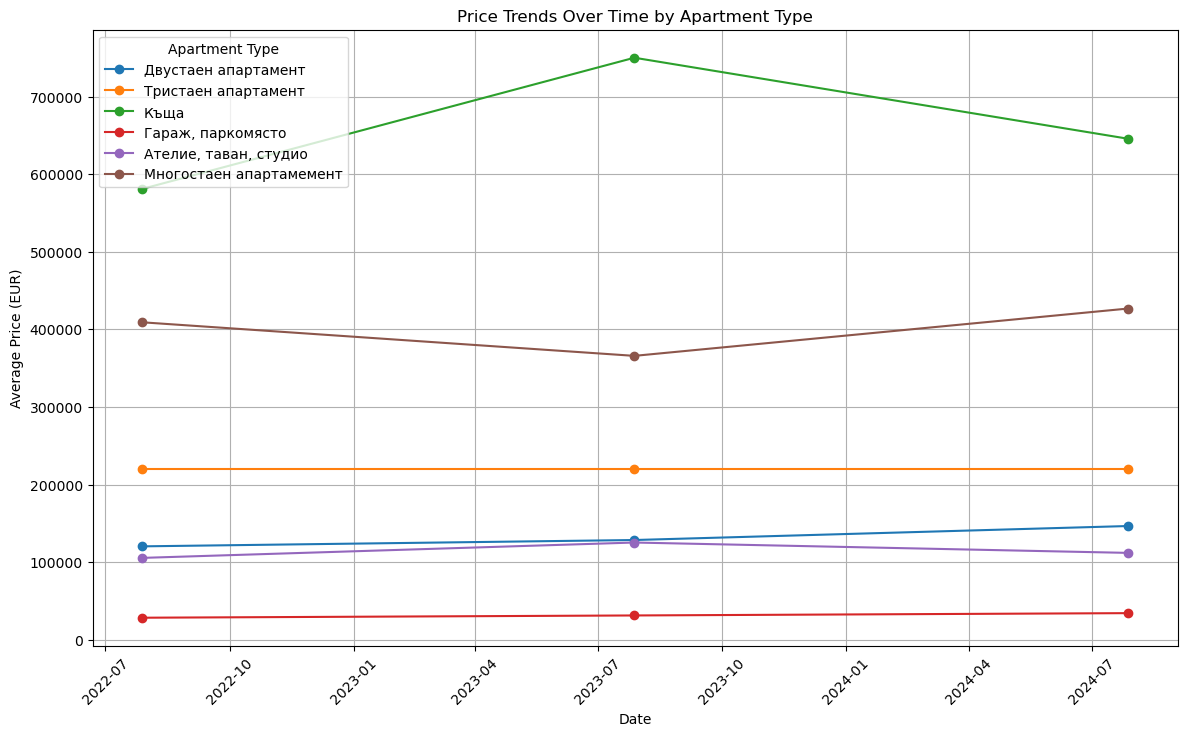

In [27]:
apartment_types = combined_df["Тип Апартамент"].unique()

plt.figure(figsize=(14, 8))

for apartment_type in apartment_types:
    # Filter the DataFrame by apartment type
    filtered_df = combined_df[combined_df["Тип Апартамент"] == apartment_type]
    
    # Group by date and calculate the mean price for each date
    price_over_time = filtered_df.groupby('Дата')['Цена'].mean()
    
    # Plot the line for this apartment type
    plt.plot(price_over_time.index, price_over_time.values, marker='o', label=apartment_type)

plt.title('Price Trends Over Time by Apartment Type')
plt.xlabel('Date')
plt.ylabel('Average Price (EUR)')
plt.xticks(rotation=45)
plt.legend(title='Apartment Type')
plt.grid(True)
plt.show()

Let's see how many unique Ragions we have:

In [30]:
len(combined_df['Район'].unique())

100

And which they are:

In [31]:
combined_df['Район'].unique()

array(['Банишора', 'Белите Брези', 'Борово', 'Бояна', 'Бъкстон', 'Витоша',
       'Гевгелийски', 'Гео Милев', 'Горна Баня', 'Гоце Делчев',
       'Дианабад', 'Драгалевци', 'Дружба 1', 'Дружба 2', 'Дървеница',
       'Западен Парк', 'Захарна Фабрика', 'Зона Б18', 'Зона Б19',
       'Зона Б5', 'Иван Вазов', 'Изгрев', 'Изток', 'Илинден', 'Княжево',
       'Красна Поляна', 'Красно Село', 'Кръстова Вада', 'Лагера',
       'Левски', 'Левски В', 'Левски Г', 'Лозенец', 'Люлин 1', 'Люлин 10',
       'Люлин 2', 'Люлин 3', 'Люлин 4', 'Люлин 5', 'Люлин 6', 'Люлин 7',
       'Люлин 8', 'Люлин 9', 'Люлин Център', 'м-т Гърдова глава',
       'Малинова Долина', 'Манастирски ливади Запад',
       'Манастирски ливади Изток', 'Младост 1', 'Младост 1а', 'Младост 2',
       'Младост 3', 'Младост 4', 'Мотописта', 'Мусагеница', 'Надежда 1',
       'Надежда 2', 'Надежда 3', 'Надежда 4', 'Обеля', 'Обеля 1',
       'Обеля 2', 'Оборище', 'Овча Купел', 'Овча Купел 1', 'Овча Купел 2',
       'Павлово', 'Подуене', 

In [32]:
len(second_df['Район'].unique())

152

In [33]:
second_df['Район'].unique()

array(['7-ми 11-ти километър', 'Банишора', 'Белите брези', 'Бенковски',
       'Борово', 'Ботунец', 'Ботунец 2', 'Бояна', 'Бъкстон', 'Витоша',
       'Военна рампа', 'Враждебна', 'Връбница 1', 'Връбница 2',
       'Гевгелийски', 'Гео Милев', 'Горна баня', 'Горубляне',
       'Гоце Делчев', 'Градина', 'Дианабад', 'Докторски паметник',
       'Драгалевци', 'Дружба 1', 'Дружба 2', 'Дървеница',
       'Експериментален', 'Западен парк', 'Захарна фабрика', 'Зона Б-18',
       'Зона Б-19', 'Зона Б-5', 'Зона Б-5-3', 'Иван Вазов', 'Изгрев',
       'Изток', 'Илинден', 'Илиянци', 'Карпузица', 'Княжево',
       'Красна поляна 1', 'Красна поляна 2', 'Красна поляна 3',
       'Красно село', 'Кремиковци', 'Кръстова вада', 'Лагера', 'Левски',
       'Левски В', 'Левски Г', 'Летище София', 'Лозенец',
       'Люлин - център', 'Люлин 1', 'Люлин 10', 'Люлин 2', 'Люлин 3',
       'Люлин 4', 'Люлин 5', 'Люлин 6', 'Люлин 7', 'Люлин 8', 'Люлин 9',
       'Малашевци', 'Малинова долина', 'Манастирски ливади',
 

In [35]:
second_df['Едностайни - цена'].max()

142500.0

In [64]:
top_5_rows = second_df.nlargest(5, 'Едностайни - цена')  
top_5_rows

,Район,Едностайни - цена,Едностайни - €/кв.м,Двустайни - цена,Двустайни - €/кв.м,Тристайни - цена,Тристайни - €/кв.м,Общо - €/кв.м,Дата
314,Докторски паметник,142500.0,4750.0,242231.0,4115.0,285000.0,3585.0,3762,2022-07-26
180,Иван Вазов,141550.0,1705.0,85500.0,1285.0,171000.0,1890.0,2015,2023-07-25
181,Изгрев,141075.0,3135.0,172282.0,2618.0,296400.0,2837.0,2813,2023-07-25
97,Симеоново,129675.0,2152.0,125900.0,1567.0,245100.0,1900.0,1888,2024-08-06
122,в.з.Малинова долина,123500.0,2205.0,135850.0,1632.0,285000.0,2040.0,2050,2024-08-06


#### Let's plot and the second dataset:

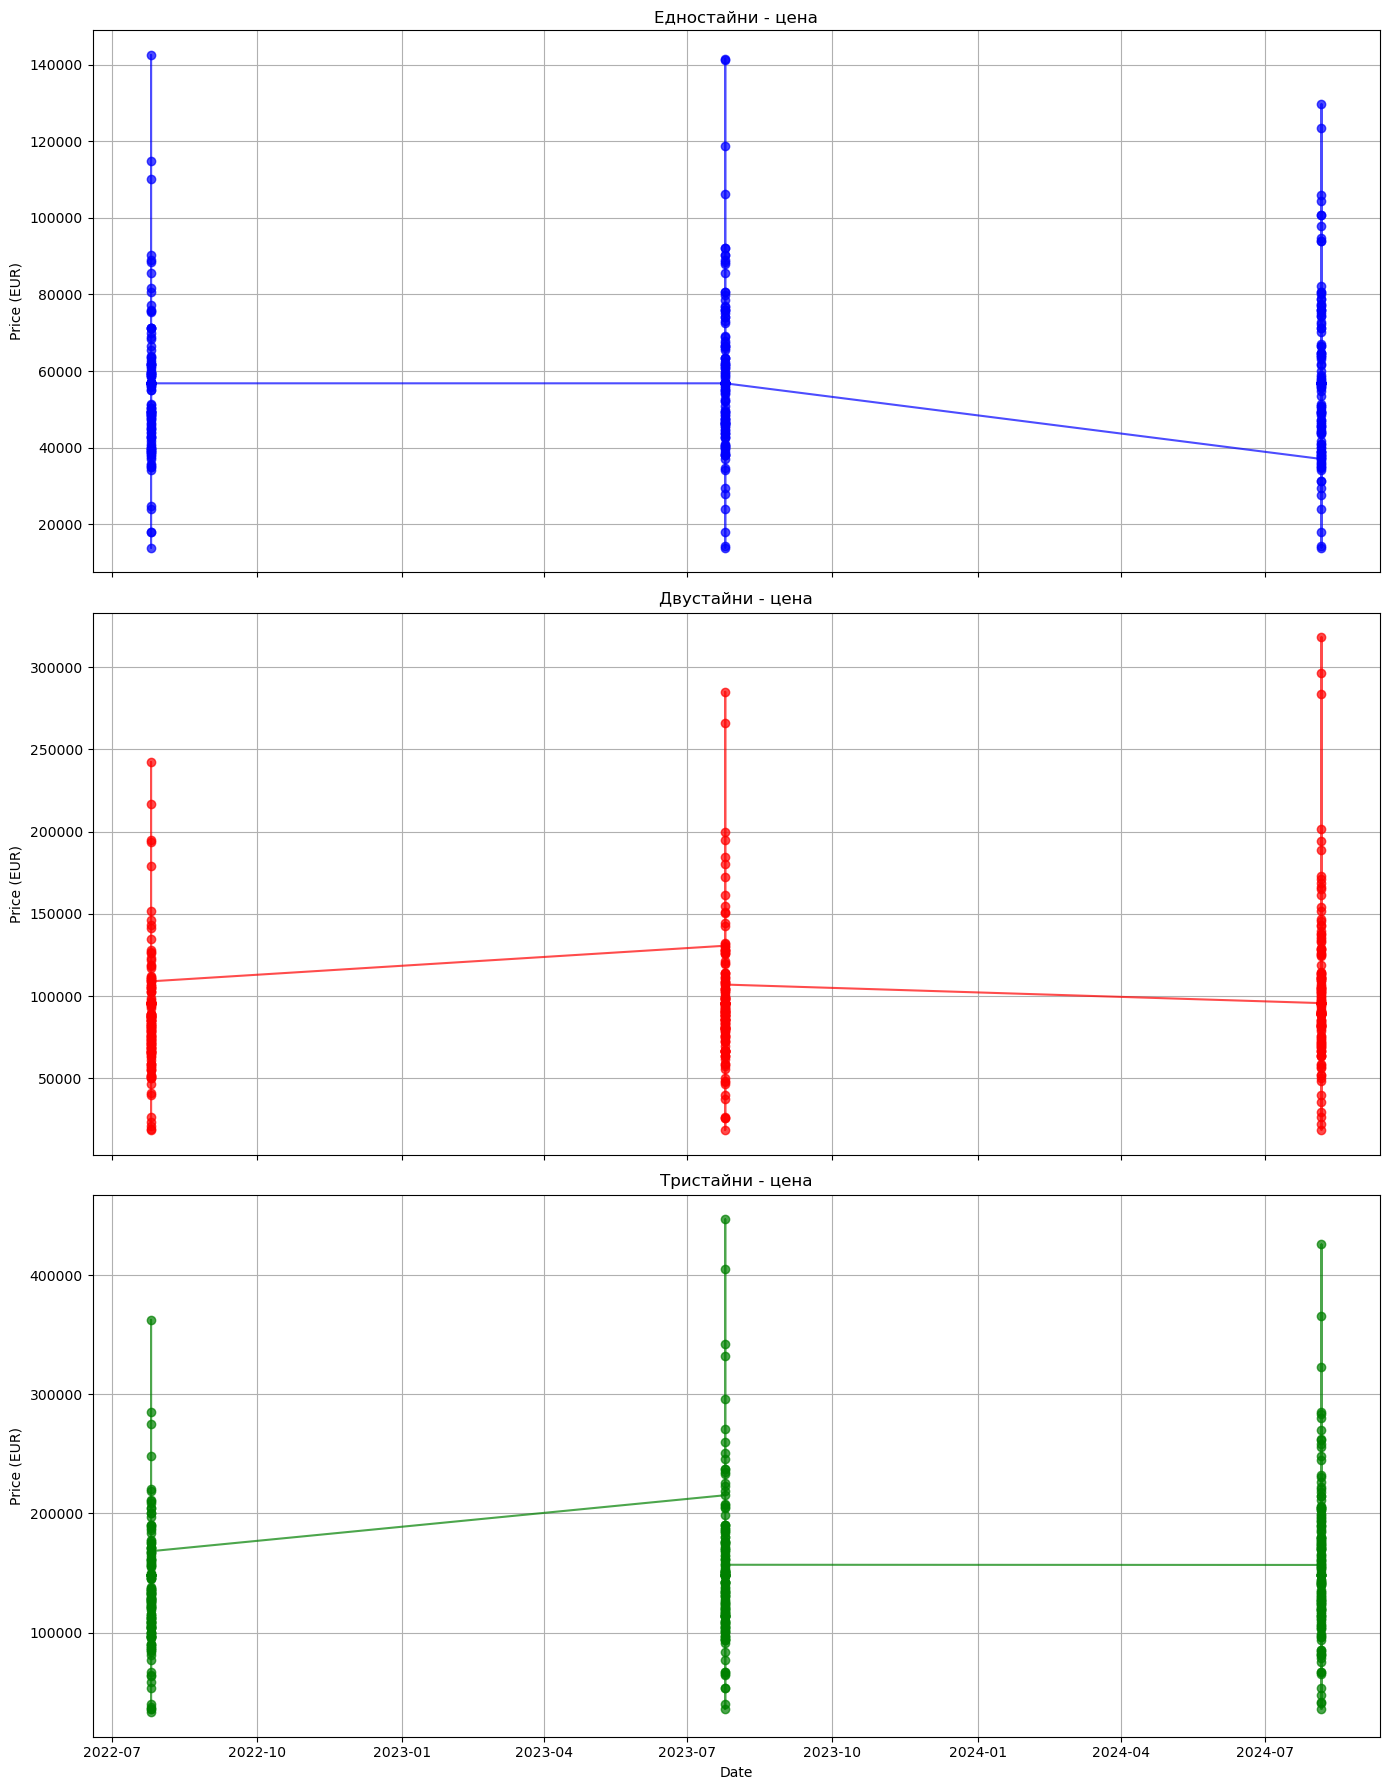

In [62]:
# Create a figure with 3 subplots arranged in a single column
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(14, 18), sharex=True)

# Plotting 'Едностайни - цена'
axs[0].plot(
    second_df['Дата'], 
    second_df['Едностайни - цена'], 
    marker='o', 
    color='b', 
    alpha=0.7  # Adjust transparency level (0 to 1)
)
axs[0].set_title('Едностайни - цена')
axs[0].set_ylabel('Price (EUR)')
axs[0].grid(True)

# Plotting 'Двустайни - цена'
axs[1].plot(
    second_df['Дата'], 
    second_df['Двустайни - цена'], 
    marker='o', 
    color='r', 
    alpha=0.7  # Adjust transparency level (0 to 1)
)
axs[1].set_title('Двустайни - цена')
axs[1].set_ylabel('Price (EUR)')
axs[1].grid(True)

# Plotting 'Тристайни - цена'
axs[2].plot(
    second_df['Дата'], 
    second_df['Тристайни - цена'], 
    marker='o', 
    color='g', 
    alpha=0.7  # Adjust transparency level (0 to 1)
)
axs[2].set_title('Тристайни - цена')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Price (EUR)')
axs[2].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()